<a href="https://colab.research.google.com/github/KhansaKhanam/Predictive-Analytics/blob/main/MultiLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### **MGS 616: Predictive Analytics – Fall 2024**
# **Homework 3**



---

* **Name:** *Khansa Khanam Umar*
* **UBIT Name:** *khansakh*
* **UBIT Number:** *50560596*


---

### **ASIGNMENT DESCRIPTION :**

Predicting Prices of Used Cars. The file ToyotaCorolla.csv contains data on used cars (Toyota Corolla) on sale during late summer of 2004 in the Netherlands. It has 1436 records containing details on 38 attributes, including Price, Age, Kilometers, HP, and other specifications. The goal is to predict the
price of a used Toyota Corolla based on its specifications.

---

# **MULTIPLE LINEAR REGRESSION**

Multiple Linear Regression attempts to model the relationship between two or more features and a response by fitting a linear equation to observed data. The steps to perform multiple linear Regression are almost similar to that of simple linear Regression. The Difference Lies in the evaluation. We can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.

## **Assumption of Regression Model :**

1. **Linearity**: The relationship between dependent and independent variables should be linear. This means that the change in dependent variable will have an effect on the independent variable too.

2. **Homoscedasticity**: Constant variance of the errors should be maintained. This will make sure the dataset is not-biased. We can use a Residual plot for the same, ideally, the residuals should be scattered randomly without any discernible pattern.

3. **Multivariate normality**: The residuals (differences between observed and predicted values) should be normally distributed. This assumption is especially important for hypothesis testing and constructing confidence intervals.

4. **Lack of Multicollinearity**: The independent variables should not be highly correlated with each other. Multicollinearity makes it difficult to isolate the individual effects of each predictor, leading to unreliable estimates of regression coefficients.Variance Inflation Factor (VIF) is commonly used to check for multicollinearity. A VIF value above 5 (sometimes 10) suggests high multicollinearity.










# **STEP 1: DATA PREPROCESSING**

1. Importing The Libraries.
2. Importing the dataset
3. Encoding the Categorical Data.
4. Splitting the Data set into Training Set and Test Set.

In [111]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

In [112]:
# Importing the dataset
cars = pd.read_csv('ToyotaCorolla.csv')
cars.head(10)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
6,7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,...,1,1,0,0,1,1,0,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
8,9,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,1,1,0,0,0,1,1,0,0
9,10,TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,...,0,1,0,0,0,1,0,0,0,0


In [113]:
cars.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.002786,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.052723,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
outcome = 'Price'
predictors = ['Age_08_04','KM','Fuel_Type','HP','Automatic','Doors','Quarterly_Tax','Mfr_Guarantee','Guarantee_Period','Airco','Automatic_airco','CD_Player','Powered_Windows','Sport_Model','Tow_Bar']
X = cars[predictors]
y = cars[outcome]

In [115]:
# Encoding the Categorical Data
X = pd.get_dummies(cars[predictors], drop_first=True)
X.head(10)

,Age_08_04,KM,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,3,210,0,3,0,0,0,1,0,0,True,False
1,23,72937,90,0,3,210,0,3,1,0,1,0,0,0,True,False
2,24,41711,90,0,3,210,1,3,0,0,0,0,0,0,True,False
3,26,48000,90,0,3,210,1,3,0,0,0,0,0,0,True,False
4,30,38500,90,0,3,210,1,3,1,0,0,1,0,0,True,False
5,32,61000,90,0,3,210,0,3,1,0,0,1,0,0,True,False
6,27,94612,90,0,3,210,0,3,1,0,0,1,1,0,True,False
7,30,75889,90,0,3,210,1,3,1,0,1,1,0,0,True,False
8,27,19700,192,0,3,100,0,3,1,0,0,1,0,0,False,True
9,23,71138,69,0,3,185,0,3,1,0,0,0,0,0,True,False


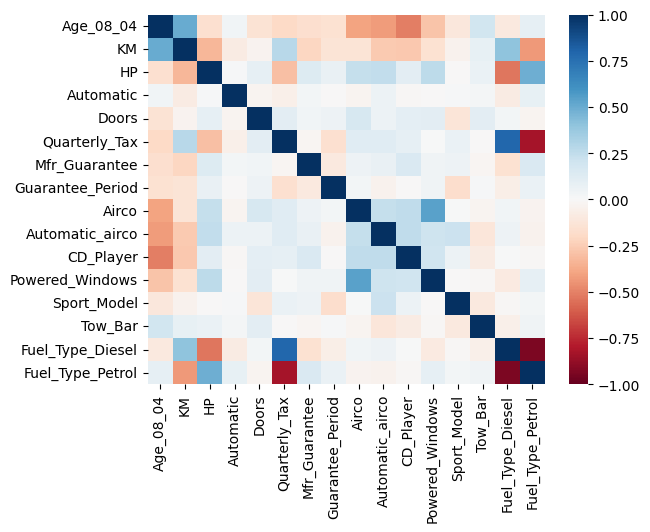

In [116]:
corr = X.corr()
_ = sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, vmin = -1, vmax = 1, cmap = 'RdBu')

In [117]:
corr

,Age_08_04,KM,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Fuel_Type_Diesel,Fuel_Type_Petrol
Age_08_04,1.000000,0.505672,-0.156622,0.031717,-0.148359,-0.198431,-0.164658,-0.152563,-0.403600,-0.426259,-0.510895,-0.283856,-0.110988,0.188720,-0.097740,0.092611
KM,0.505672,1.000000,-0.333538,-0.081854,-0.036197,0.278165,-0.212851,-0.138942,-0.133057,-0.258221,-0.266826,-0.156242,-0.044784,0.084153,0.403060,-0.433160
HP,-0.156622,-0.333538,1.000000,0.013144,0.092424,-0.298432,0.140026,0.076163,0.241134,0.244957,0.102300,0.265593,-0.006027,0.068271,-0.533453,0.489110
Automatic,0.031717,-0.081854,0.013144,1.000000,-0.027654,-0.055371,0.026194,-0.002256,-0.028353,0.059057,-0.010967,-0.005864,0.013175,0.018786,-0.084490,0.080249
Doors,-0.148359,-0.036197,0.092424,-0.027654,1.000000,0.109363,0.037689,0.053654,0.170544,0.054809,0.094653,0.107626,-0.129881,0.102292,0.025495,-0.027589
Quarterly_Tax,-0.198431,0.278165,-0.298432,-0.055371,0.109363,1.000000,-0.022150,-0.163438,0.118225,0.123125,0.090868,0.003827,0.067525,-0.004988,0.792726,-0.835452
Mfr_Guarantee,-0.164658,-0.212851,0.140026,0.026194,0.037689,-0.022150,1.000000,-0.098563,0.051234,0.072635,0.155637,0.041551,0.054129,-0.023328,-0.152741,0.150160
Guarantee_Period,-0.152563,-0.138942,0.076163,-0.002256,0.053654,-0.163438,-0.098563,1.000000,0.026246,-0.039163,-0.003948,0.040534,-0.172874,0.008590,-0.065161,0.065737
Airco,-0.403600,-0.133057,0.241134,-0.028353,0.170544,0.118225,0.051234,0.026246,1.000000,0.240444,0.257387,0.543982,0.002730,-0.024362,0.032342,-0.036734
Automatic_airco,-0.426259,-0.258221,0.244957,0.059057,0.054809,0.123125,0.072635,-0.039163,0.240444,1.000000,0.250396,0.203687,0.215287,-0.117967,0.051137,-0.039955


In [118]:
# Splitting the Data set into Training Set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [119]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
cars_lm = LinearRegression()
cars_lm.fit(X_train_scaled, y_train)

LinearRegression()

In [121]:
print(cars_lm.intercept_)

10739.359331476324


In [122]:
print("Coefficients:")
list(zip(X.columns, cars_lm.coef_))

Coefficients:


[('Age_08_04', -2034.1350645608197),
 ('KM', -684.5578234438563),
 ('HP', 555.8710100730545),
 ('Automatic', 146.3880360862771),
 ('Doors', 149.9323756663888),
 ('Quarterly_Tax', 695.9779984303389),
 ('Mfr_Guarantee', 77.97283147046102),
 ('Guarantee_Period', 255.26535088118015),
 ('Airco', 64.79736513587301),
 ('Automatic_airco', 715.9078248440986),
 ('CD_Player', 117.69935948507793),
 ('Powered_Windows', 235.58636439459409),
 ('Sport_Model', 193.2853236412378),
 ('Tow_Bar', -92.1438797220332),
 ('Fuel_Type_Diesel', 640.9417969465333),
 ('Fuel_Type_Petrol', 701.6938307092169)]

In [123]:
print("\nModel performance on training data:")
print("Mean Squared error:", mean_squared_error(y_train, cars_lm.predict(X_train_scaled)))
print("R2 score:", r2_score(y_train, cars_lm.predict(X_train_scaled)))


Model performance on training data:
Mean Squared error: 1464375.6045356195
R2 score: 0.8887674302548658


In [124]:
!pip install dmba

# **PICKING BEST VARIABLES**

In [125]:
import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection,stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

# **BACKWARD ELIMINATION**

In [126]:
# List of original column names from X_train
original_columns = X_train.columns.tolist()

# Train model by selecting columns using their indices
def train_model(variables):
    selected_columns_indices = [original_columns.index(var) for var in variables]
    model = LinearRegression()
    model.fit(X_train_scaled[:, selected_columns_indices], y_train)
    return model

# Calculate AIC using formula: AIC = n * log(MSE) + 2 * k
def calc_aic(n, mse, k):
    return n * np.log(mse) + 2 * k

# Score model by calculating AIC
def score_model(model, variables):
    selected_columns_indices = [original_columns.index(var) for var in variables]
    mse = mean_squared_error(y_train, model.predict(X_train_scaled[:, selected_columns_indices]))
    n = len(y_train)  # Number of observations
    k = len(variables) + 1  # Number of variables + intercept
    return calc_aic(n, mse, k)

# Perform backward elimination by passing column names instead of indices
best_model, best_variables = backward_elimination(original_columns, train_model, score_model, verbose=True)

print("Best Subset:", best_variables)

Variables: Age_08_04, KM, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, Tow_Bar, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=15324.10
Step: score=15324.01, remove Airco
Step: score=15324.01, remove None
Best Subset: ['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']


# **FORWARD SELECTION**

In [127]:
# Map column names to indices
column_indices = {col: idx for idx, col in enumerate(original_columns)}

def train_model(variables):
    if len(variables) == 0:
        return None
    indices = [column_indices[var] for var in variables]  # Map variable names to column indices
    model = LinearRegression()
    model.fit(X_train_scaled[:, indices], y_train)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y_train, [y_train.mean()] * len(y_train), model, df=1)
    indices = [column_indices[var] for var in variables]  # Map variable names to column indices
    return AIC_score(y_train, model.predict(X_train_scaled[:, indices]), model)

# Perform forward selection
best_model, best_variables = forward_selection(original_columns, train_model, score_model, verbose=True)

# Output the best subset of variables
print("Best Subset:", best_variables)

Variables: Age_08_04, KM, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, Tow_Bar, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=20715.73, constant
Step: score=19180.00, add Age_08_04
Step: score=18890.52, add Automatic_airco
Step: score=18742.70, add HP
Step: score=18668.53, add KM
Step: score=18528.67, add Quarterly_Tax
Step: score=18491.32, add Powered_Windows
Step: score=18468.55, add Guarantee_Period
Step: score=18447.30, add Sport_Model
Step: score=18434.97, add Doors
Step: score=18423.97, add Automatic
Step: score=18418.99, add CD_Player
Step: score=18415.92, add Tow_Bar
Step: score=18413.27, add Fuel_Type_Petrol
Step: score=18384.36, add Fuel_Type_Diesel
Step: score=18382.40, add Mfr_Guarantee
Step: score=18382.40, add None
Best Subset: ['Age_08_04', 'Automatic_airco', 'HP', 'KM', 'Quarterly_Tax', 'Powered_Windows', 'Guarantee_Period', 'Sport_Model', 'Doors', 'Automatic', 'CD_Player', 'Tow_

* **Question 1:** What appear to be the three or four most important car specifications for predicting the
car’s price?*

1. Age_08_04
2. Automatic_airco
3. HP
4. KM

* **Question 2:** Using metrics you consider useful, assess the performance of the model in predicting prices*

In [128]:
predictors = ['Age_08_04','Automatic_airco','HP','KM']
outcome = 'Price'

column_indices = {col: idx for idx, col in enumerate(original_columns)}
predictor_indices = [column_indices[predictor] for predictor in predictors]

# Select the appropriate columns from the NumPy array using the indices
X_train_selected = X_train_scaled[:, predictor_indices]
y_train_selected = y_train

# Train the linear regression model
cars_lm = LinearRegression()
cars_lm.fit(X_train_selected, y_train_selected)

# Print the intercept and coefficients
print("Intercept:", cars_lm.intercept_)
print("Coefficients:")
for feature, coef in zip(predictors, cars_lm.coef_):
    print(f"{feature}: {coef}")

# Model performance on training data
print("\nModel performance on training data:")
regressionSummary(y_train_selected, cars_lm.predict(X_train_selected))
print("\n")

# Predict on test data using the same columns
X_test_selected = X_test_scaled[:, predictor_indices]
cars_lm_pred = cars_lm.predict(X_test_selected)

# Create a DataFrame to compare predicted vs actual values
result = pd.DataFrame({'Predicted': cars_lm_pred, 'Actual': y_test, 'Residual': y_test - cars_lm_pred})
print(result)
print("\n")

# Model performance on validation data
print("\nModel performance on validation data:")
regressionSummary(y_test, cars_lm_pred)
print("\n")


Intercept: 10739.359331476324
Coefficients:
Age_08_04: -2497.525402358639
Automatic_airco: 834.02815003389
HP: 472.2613464618656
KM: -455.6228538991812

Model performance on training data:

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1397.4503
            Mean Absolute Error (MAE) : 1016.1037
          Mean Percentage Error (MPE) : -1.3135
Mean Absolute Percentage Error (MAPE) : 9.8908


         Predicted  Actual     Residual
509   11874.127150   10900  -974.127150
435   11022.550580   10895  -127.550580
321   13849.577765   10750 -3099.577765
1055   6302.238830    6500   197.761170
288   12260.554925   11895  -365.554925
...            ...     ...          ...
202   12350.921132   10500 -1850.921132
1008   9575.559463    9750   174.440537
767    9731.004598    9500  -231.004598
310   13281.415346   12950  -331.415346
891    9233.179030   11500  2266.820970

[359 rows x 3 columns]



Model performance on validation dat